In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.manifold import TSNE

plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
qpes = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/QPE_sim_lcsoft_dt250_feats.csv',delimiter=',')
qpeh = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/QPE_sim_lchard_dt250_feats.csv',delimiter=',')
qpef = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/QPE_sim_lcfull_dt250_feats.csv',delimiter=',')
npes = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/nPE_sim_lcsoft_dt250_feats.csv',delimiter=',')
npeh = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/nPE_sim_lchard_dt250_feats.csv',delimiter=',')
npef = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/nPE_sim_lcfull_dt250_feats.csv',delimiter=',')
qpos = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/QPO_sim_lcsoft_dt100_feats.csv',delimiter=',')
qpoh = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/QPO_sim_lchard_dt100_feats.csv',delimiter=',')
qpof = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/QPO_sim_lcfull_dt100_feats.csv',delimiter=',')
npos = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/nPO_sim_lcsoft_dt100_feats.csv',delimiter=',')
npoh = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/nPO_sim_lchard_dt100_feats.csv',delimiter=',')
npof = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/nPO_sim_lcfull_dt100_feats.csv',delimiter=',')

In [3]:
qpes_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPE/QPE_sim_lcsoft_dt250.csv',delimiter=',')
qpeh_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPE/QPE_sim_lchard_dt250.csv',delimiter=',')
qpef_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPE/QPE_sim_lcfull_dt250.csv',delimiter=',')
npes_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPE/nPE_sim_lcsoft_dt250.csv',delimiter=',')
npeh_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPE/nPE_sim_lchard_dt250.csv',delimiter=',')
npef_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPE/nPE_sim_lcfull_dt250.csv',delimiter=',')
qpos_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPO/QPO_sim_lcsoft_dt100.csv',delimiter=',')
qpoh_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPO/QPO_sim_lchard_dt100.csv',delimiter=',')
qpof_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPO/QPO_sim_lcfull_dt100.csv',delimiter=',')
npos_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPO/nPO_sim_lcsoft_dt100.csv',delimiter=',')
npoh_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPO/nPO_sim_lchard_dt100.csv',delimiter=',')
npof_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPO/nPO_sim_lcfull_dt100.csv',delimiter=',')

In [4]:
all_feats = np.zeros((40000,128),dtype=object)
all_feats[:,0] = np.arange(40000,dtype=int)
all_feats[:10000,1:43] = qpef
all_feats[:10000,43:85] = qpes
all_feats[:10000,85:127] = qpeh
all_feats[:10000,127] = 'QPE'
all_feats[10000:20000,1:43] = npef
all_feats[10000:20000,43:85] = npes
all_feats[10000:20000,85:127] = npeh
all_feats[10000:20000,127] = 'nP'
all_feats[20000:30000,1:43] = qpof
all_feats[20000:30000,43:85] = qpos
all_feats[20000:30000,85:127] = qpoh
all_feats[20000:30000,127] = 'QPO'
all_feats[30000:,1:43] = npof
all_feats[30000:,43:85] = npos
all_feats[30000:,85:127] = npoh
all_feats[30000:,127] = 'nP'

In [5]:
np.random.shuffle(all_feats)

In [6]:
train_data = all_feats[:32000,1:127]
train_labels = all_feats[:32000,127]
test_data = all_feats[32000:,1:127]
test_labels = all_feats[32000:,127]

In [7]:
rf = RFC()
rf.fit(train_data,train_labels)
rf.score(test_data,test_labels)

0.940375

In [8]:
rf.classes_

array(['QPE', 'QPO', 'nP'], dtype=object)

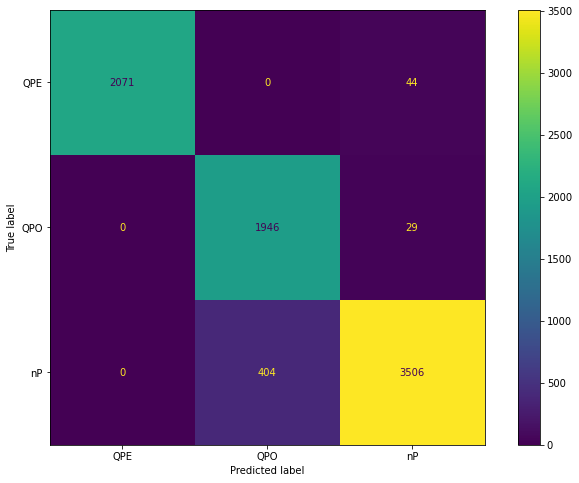

In [9]:
test_preds = rf.predict(test_data)
confmat = confusion_matrix(test_labels,test_preds)

cm_display = ConfusionMatrixDisplay(confmat,display_labels=rf.classes_).plot()

In [10]:
bad_preds = np.where(test_preds != test_labels)[0]
len(bad_preds)

477

In [11]:
tsne_transform = TSNE().fit_transform(all_feats[:,1:127])


[]

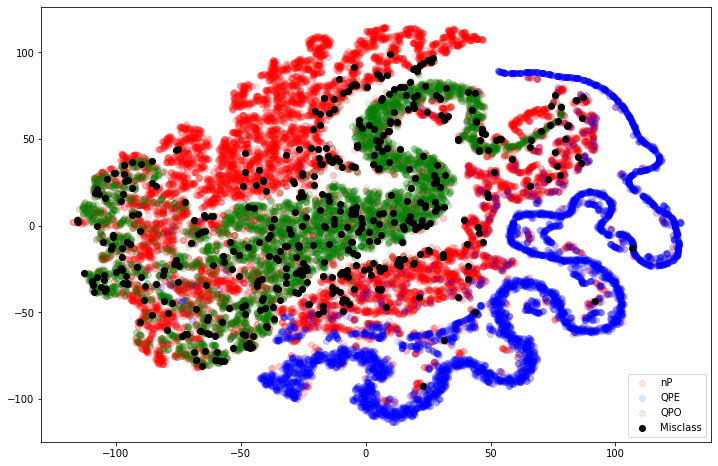

In [12]:
qpe_idxs = np.where(all_feats[:,-1] == 'QPE')[0]
qpo_idxs = np.where(all_feats[:,-1] == 'QPO')[0]
np_idxs = np.where(all_feats[:,-1] == 'nP')[0]
plt.scatter(tsne_transform[np_idxs,0],tsne_transform[np_idxs,1],color='r',alpha=0.1,label='nP')
plt.scatter(tsne_transform[qpe_idxs,0],tsne_transform[qpe_idxs,1],color='b',alpha=0.1,label='QPE')
plt.scatter(tsne_transform[qpo_idxs,0],tsne_transform[qpo_idxs,1],color='g',alpha=0.1,label='QPO')
plt.scatter(tsne_transform[bad_preds+32000,0],tsne_transform[bad_preds+32000,1],color='k',label='Misclass')
plt.legend(loc='lower right')
plt.plot()

False Negative QPEs
['nP'] [[0.01 0.   0.99]]


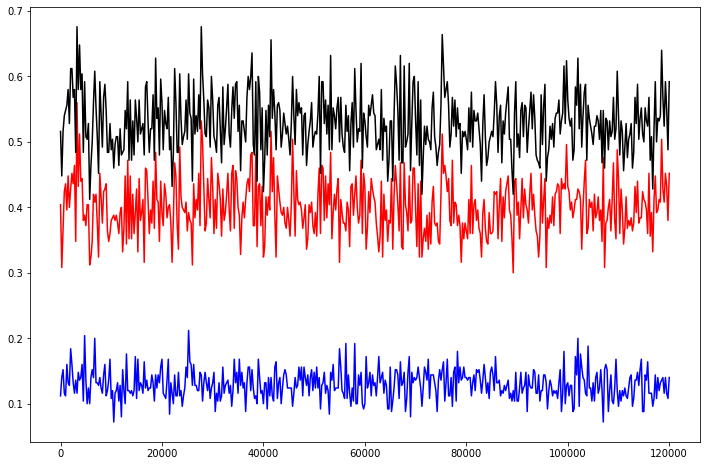

['nP'] [[0.04 0.   0.96]]


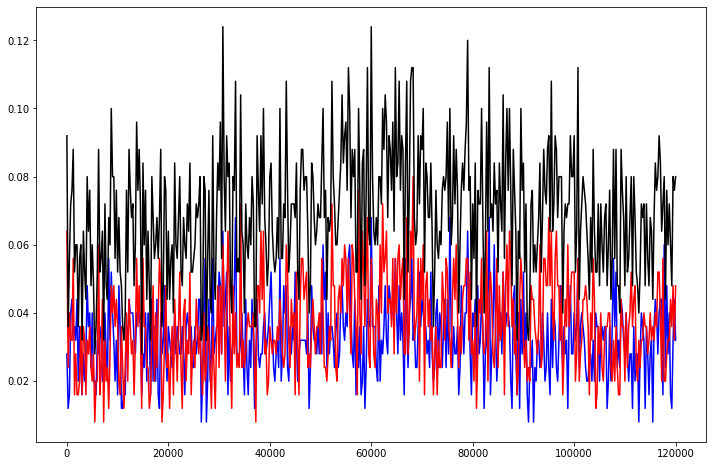

['nP'] [[0.09 0.   0.91]]


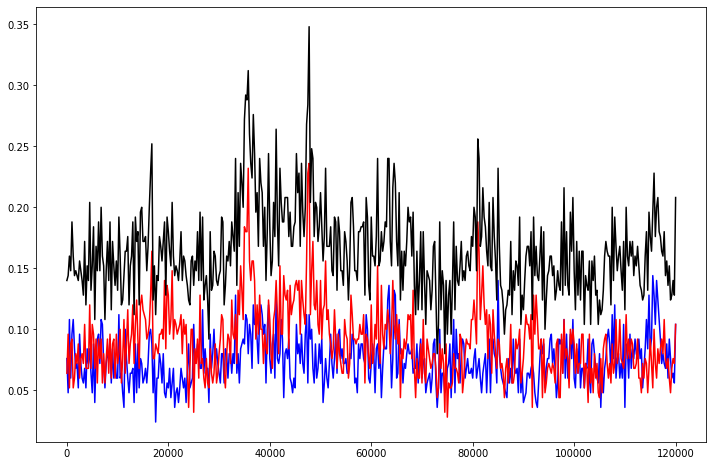

['nP'] [[0.02 0.   0.98]]


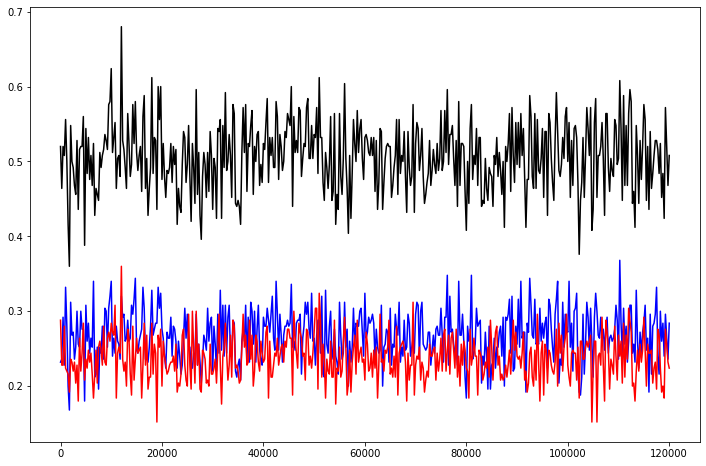

['nP'] [[0.03 0.   0.97]]


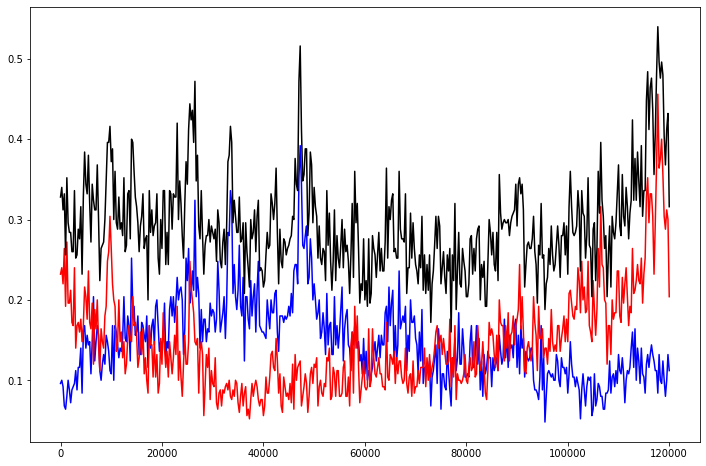

['nP'] [[0.37 0.   0.63]]


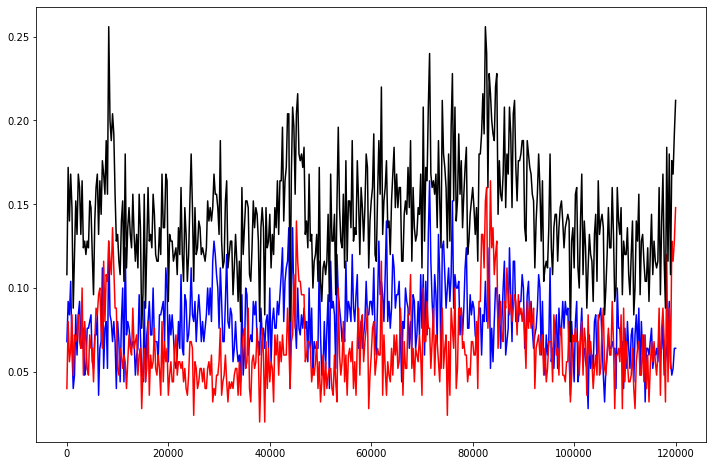

['nP'] [[0.01 0.   0.99]]


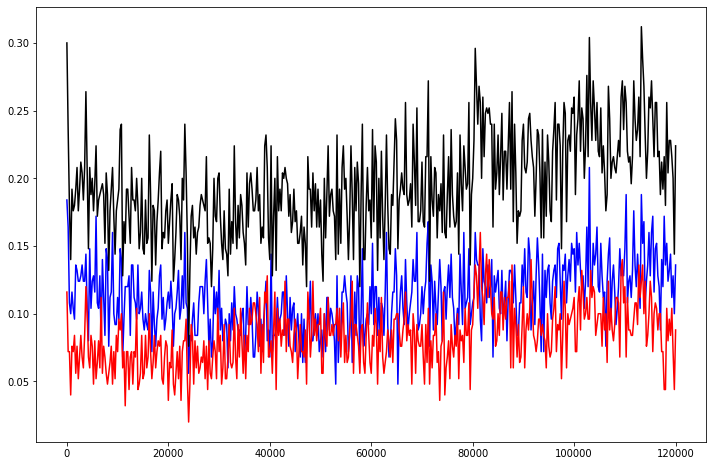

['nP'] [[0.27 0.   0.73]]


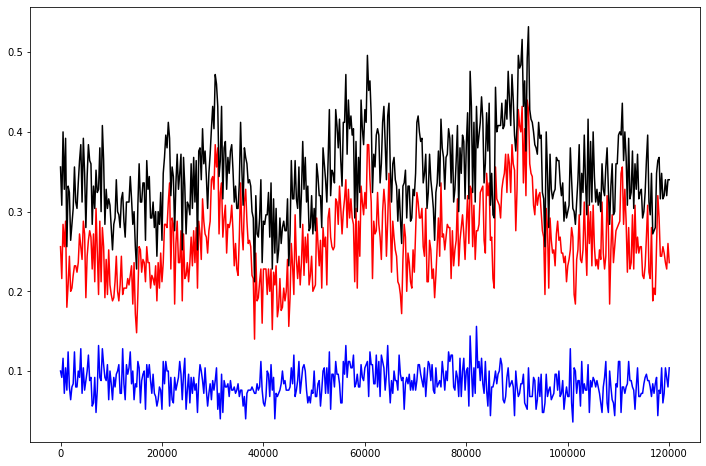

['nP'] [[0.09 0.   0.91]]


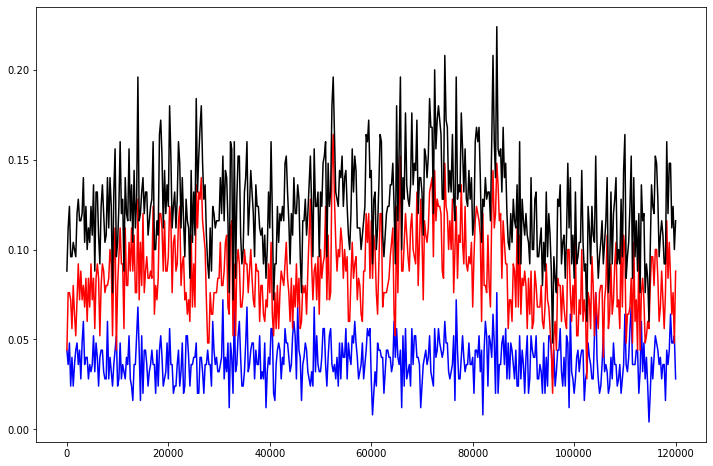

['nP'] [[0.01 0.   0.99]]


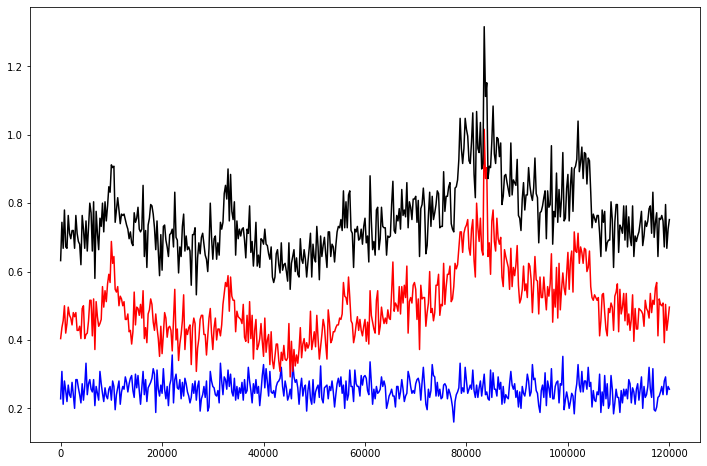

['nP'] [[0.07 0.   0.93]]


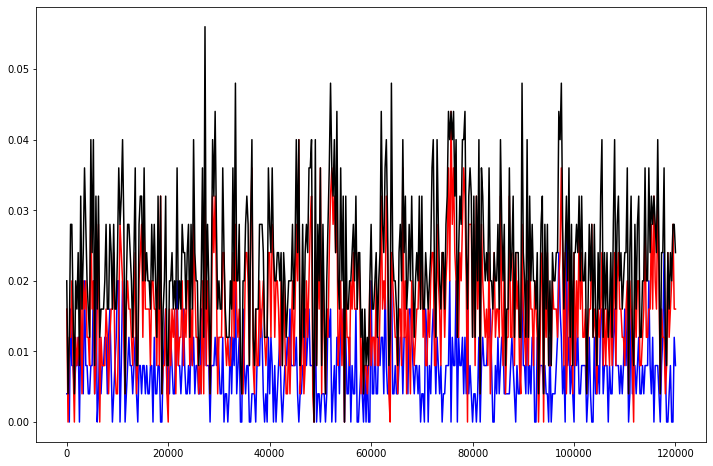

['nP'] [[0.1 0.  0.9]]


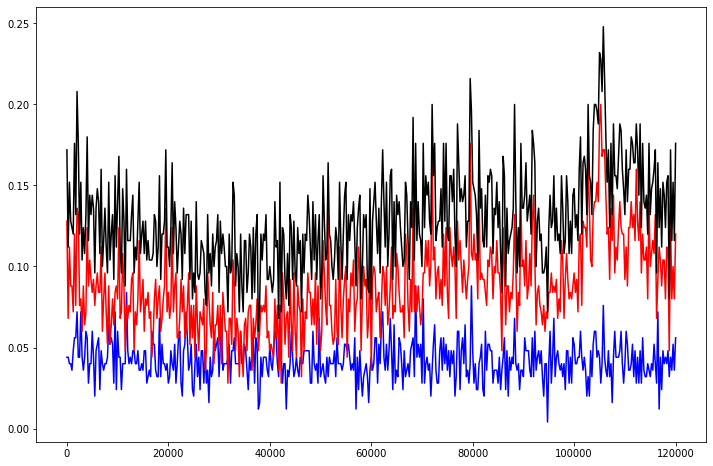

['nP'] [[0.35 0.   0.65]]


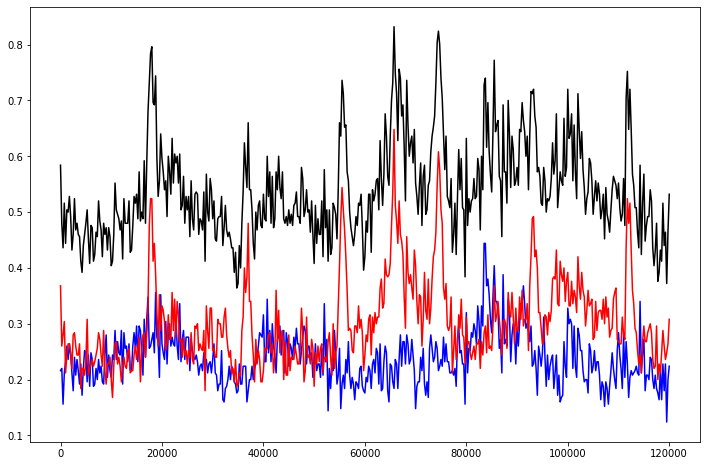

['nP'] [[0.32 0.   0.68]]


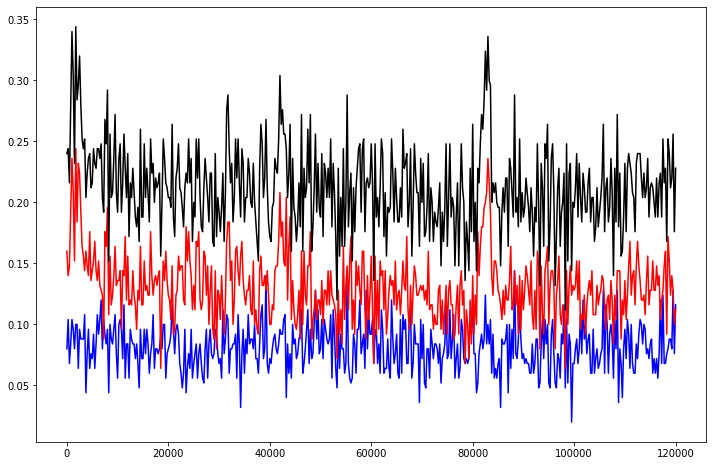

['nP'] [[0.29 0.01 0.7 ]]


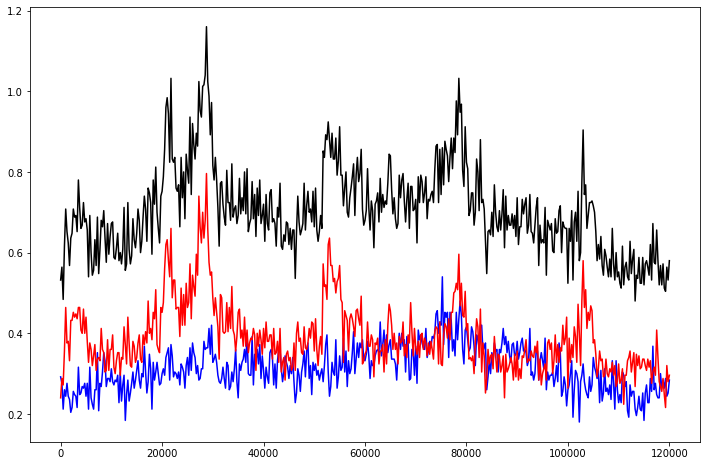

['nP'] [[0.01 0.   0.99]]


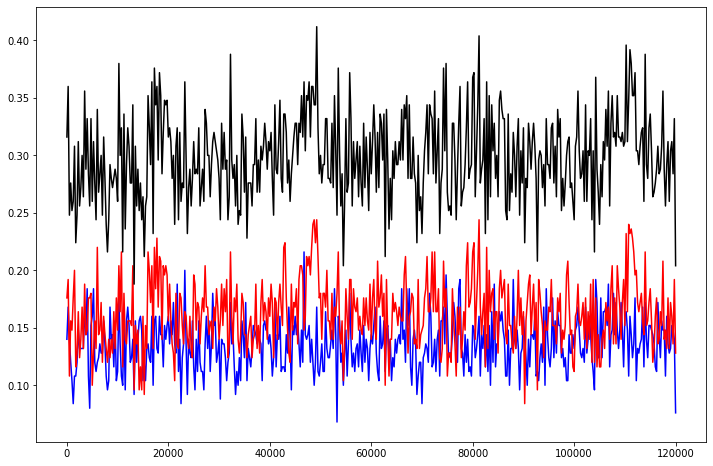

['nP'] [[0.34 0.   0.66]]


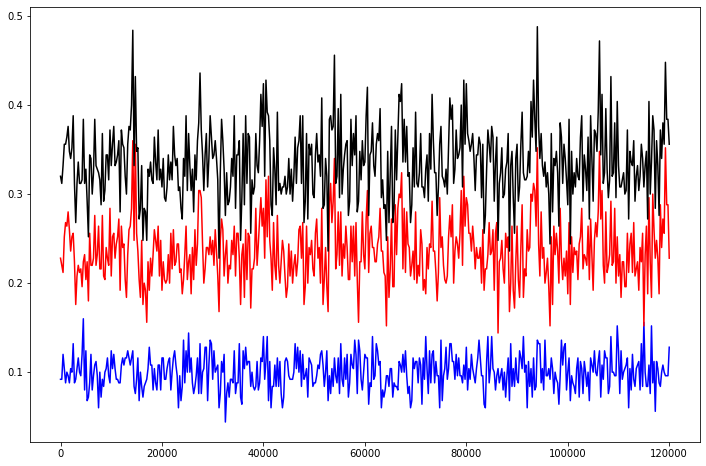

['nP'] [[0.21 0.02 0.77]]


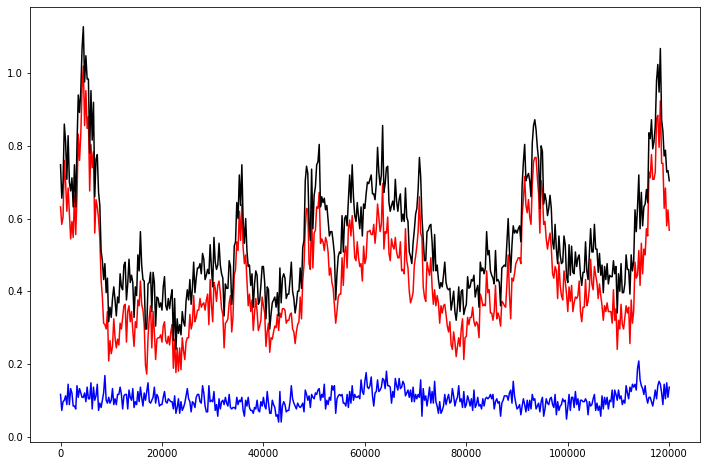

['nP'] [[0.18 0.   0.82]]


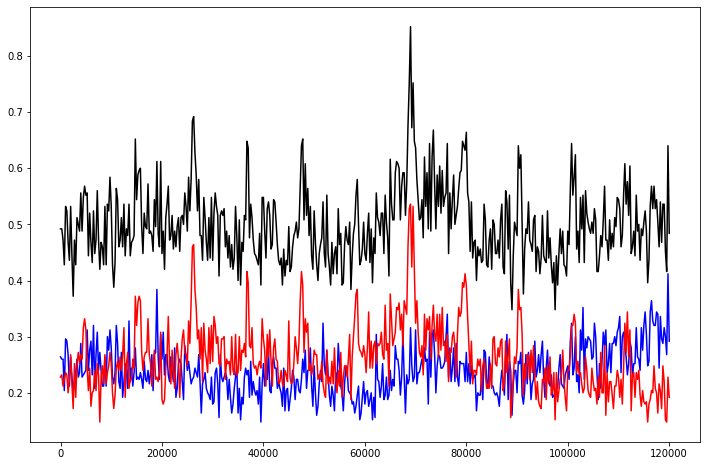

['nP'] [[0.11 0.   0.89]]


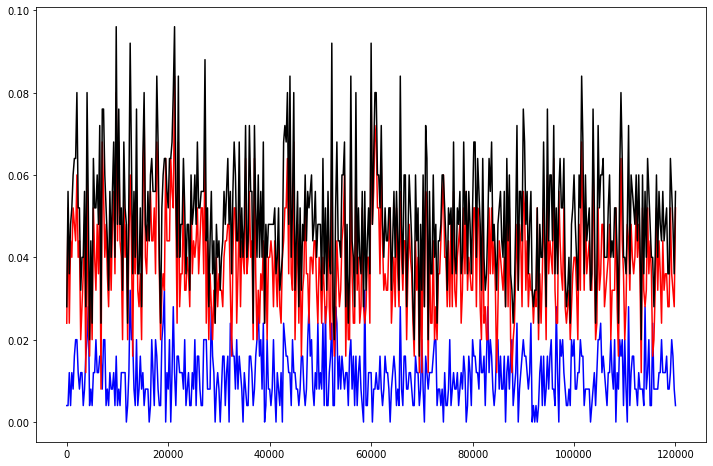

['nP'] [[0.23 0.   0.77]]


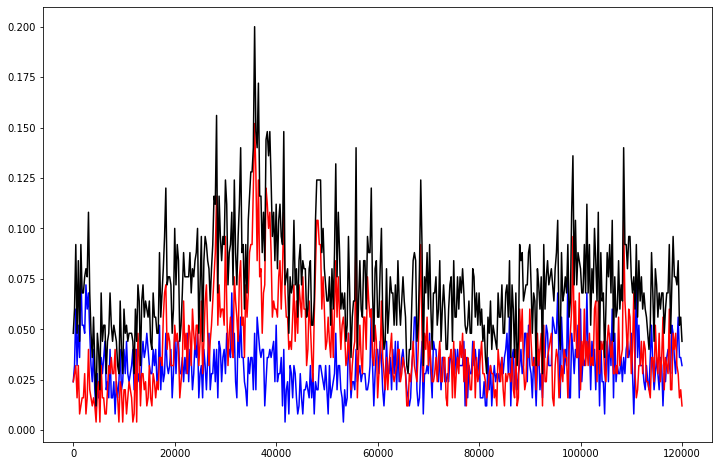

['nP'] [[0.35 0.   0.65]]


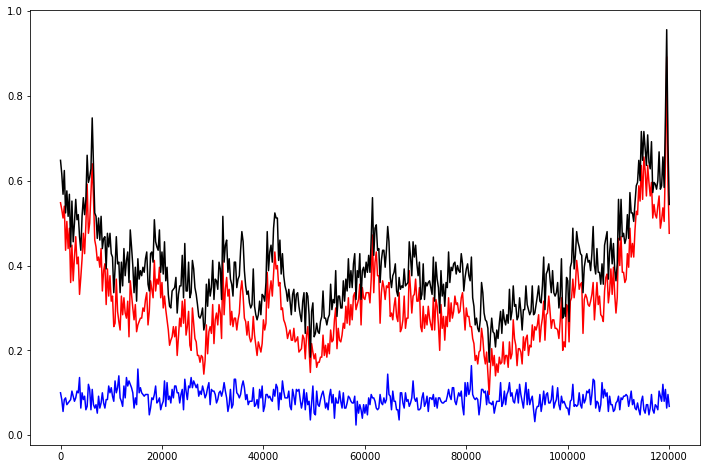

['nP'] [[0.32 0.   0.68]]


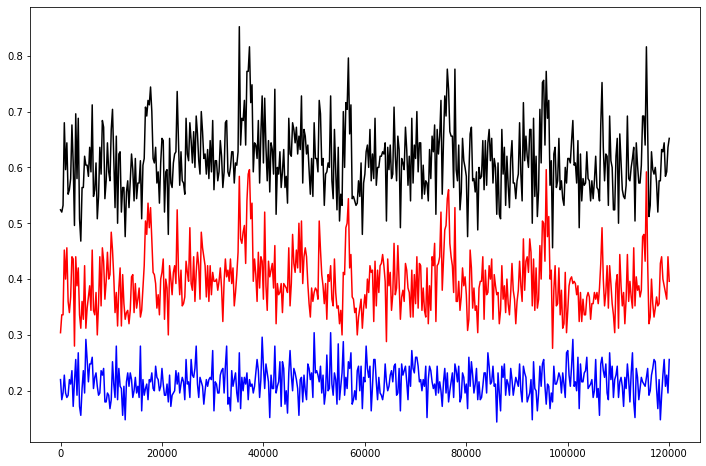

['nP'] [[0.04 0.   0.96]]


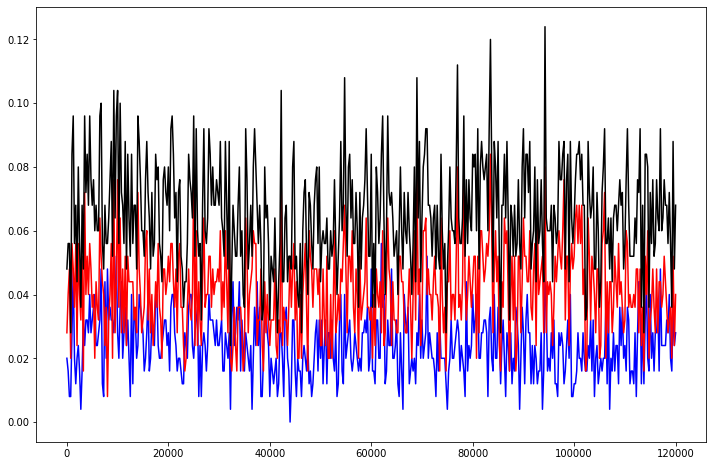

['nP'] [[0.24 0.   0.76]]


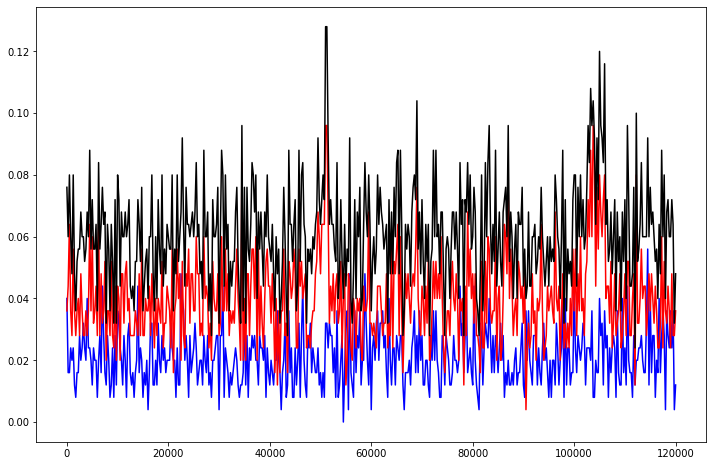

['nP'] [[0.01 0.   0.99]]


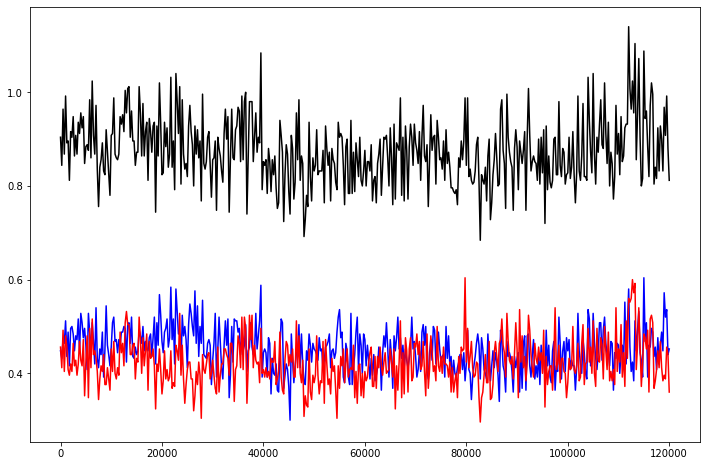

['nP'] [[0. 0. 1.]]


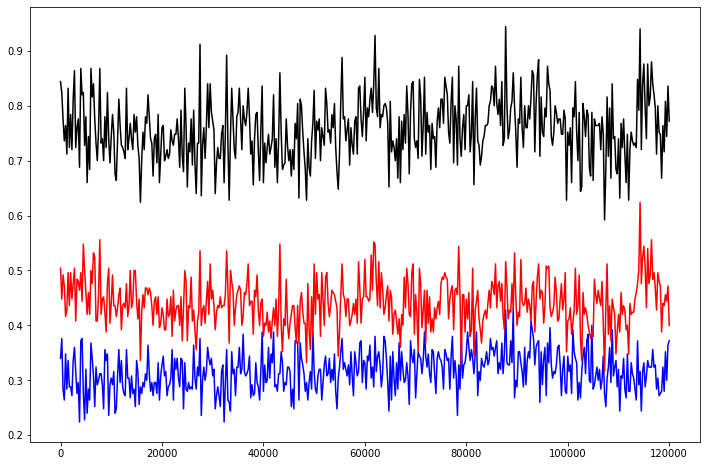

['nP'] [[0.15 0.   0.85]]


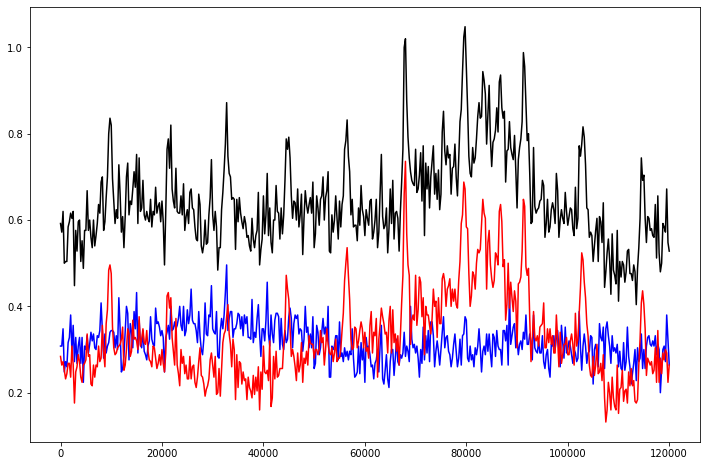

['nP'] [[0.11 0.   0.89]]


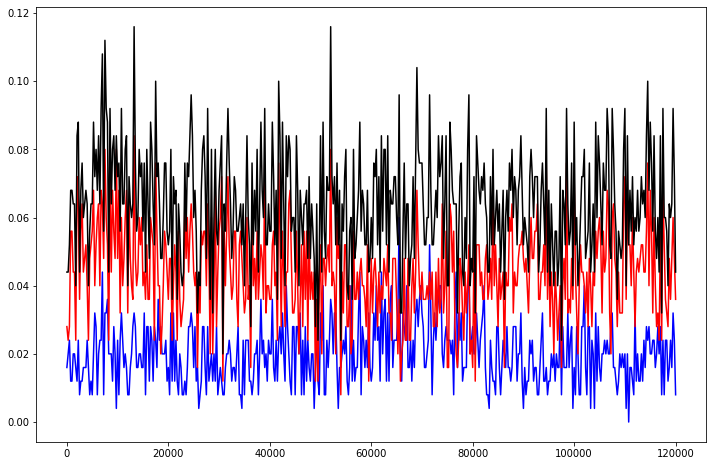

['nP'] [[0.11 0.   0.89]]


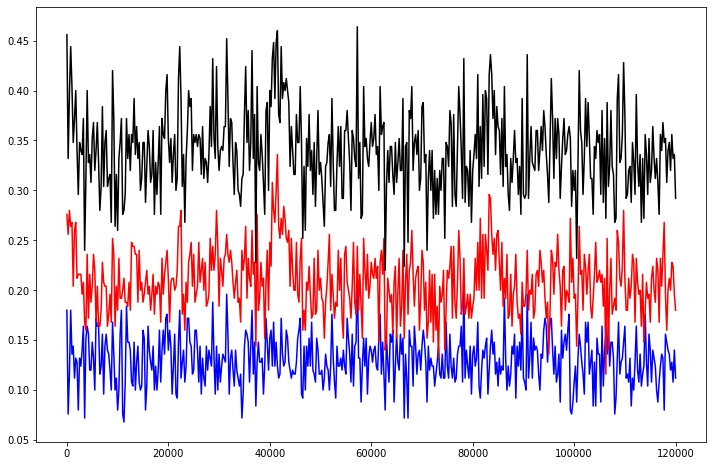

['nP'] [[0.02 0.   0.98]]


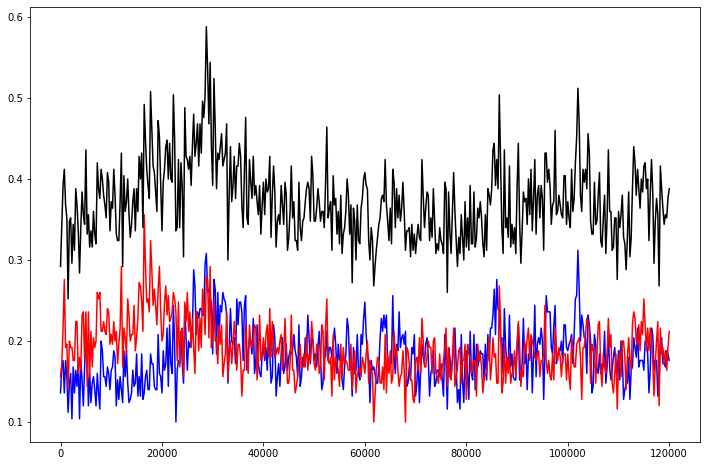

['nP'] [[0.02 0.   0.98]]


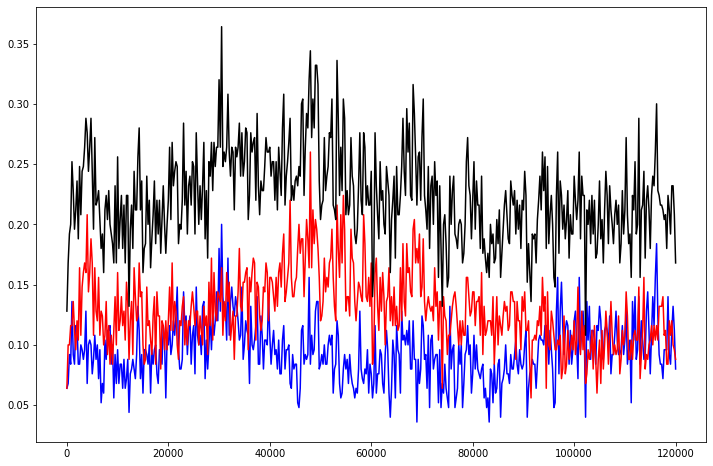

['nP'] [[0.17 0.   0.83]]


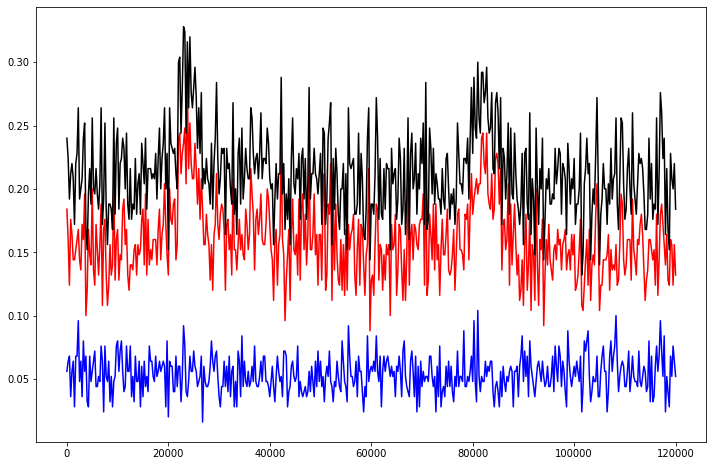

['nP'] [[0.06 0.   0.94]]


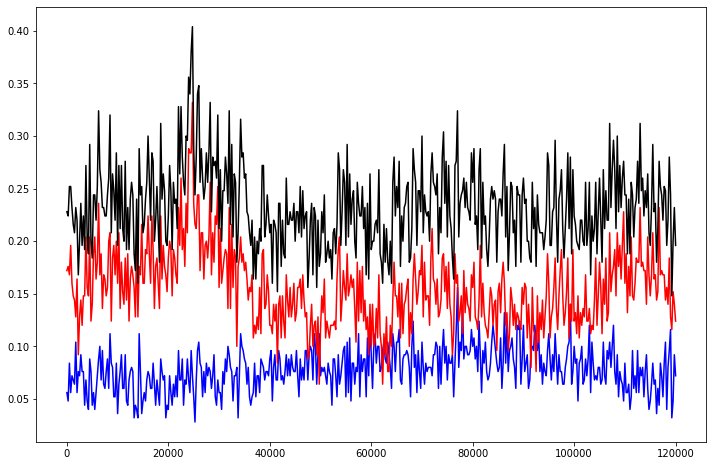

['nP'] [[0.25 0.   0.75]]


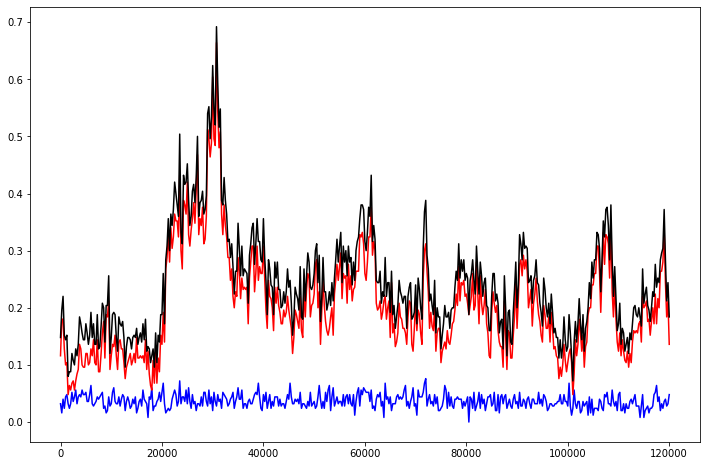

['nP'] [[0.32 0.   0.68]]


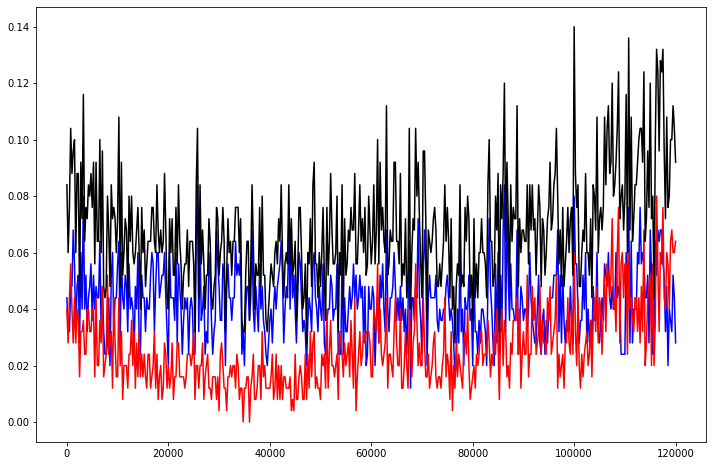

['nP'] [[0.1 0.  0.9]]


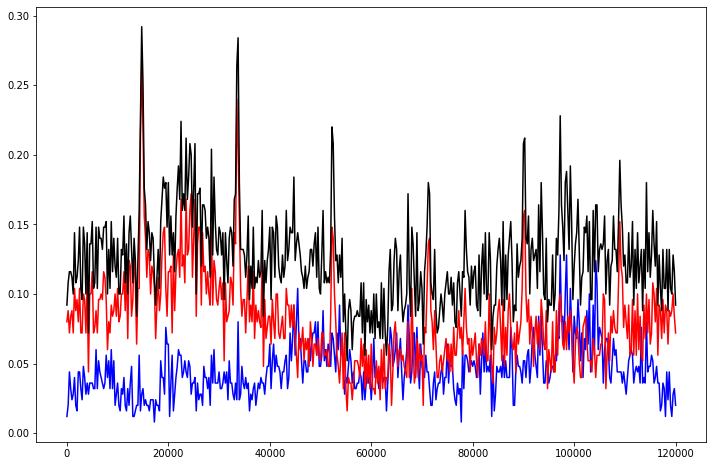

['nP'] [[0.01 0.   0.99]]


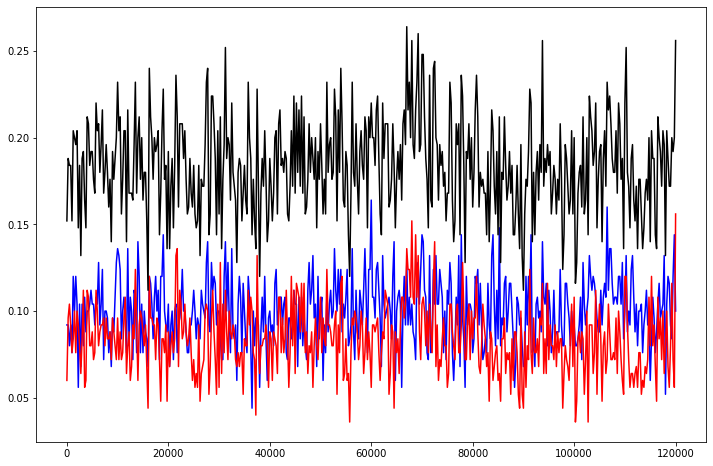

['nP'] [[0.12 0.   0.88]]


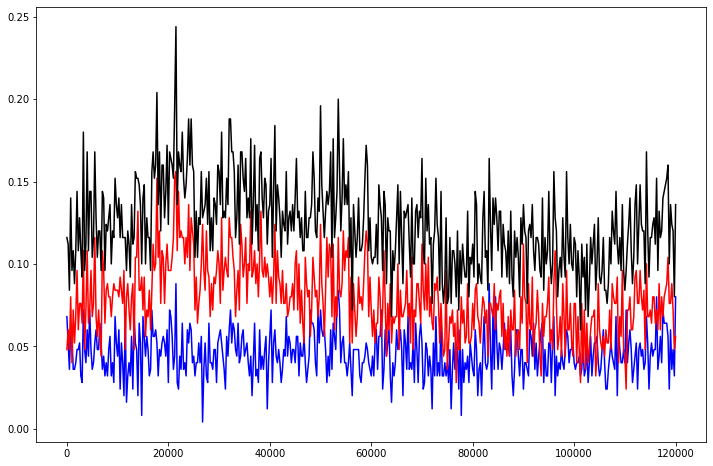

['nP'] [[0.06 0.   0.94]]


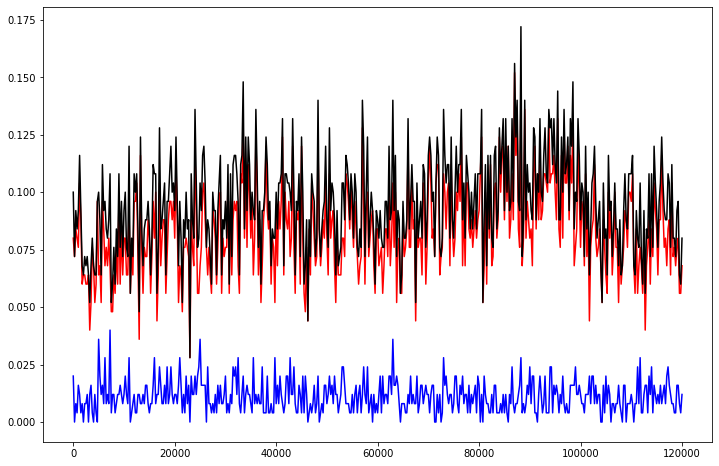

['nP'] [[0.18 0.   0.82]]


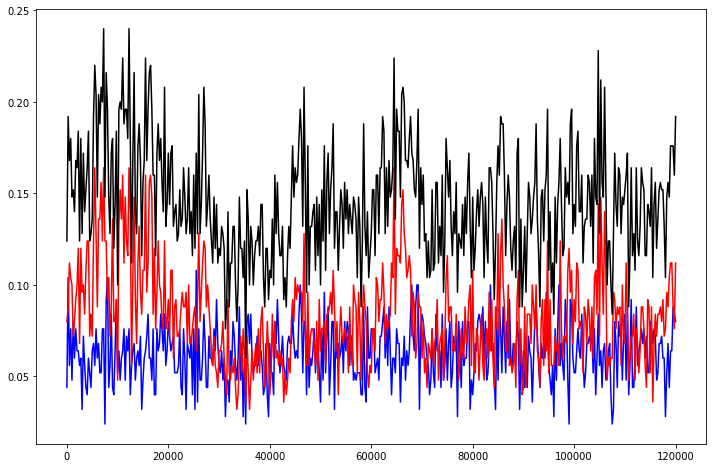

['nP'] [[0.1 0.  0.9]]


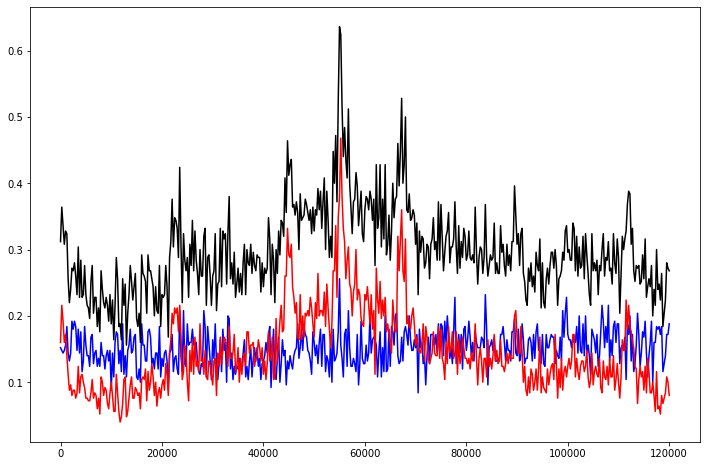

['nP'] [[0.06 0.01 0.93]]


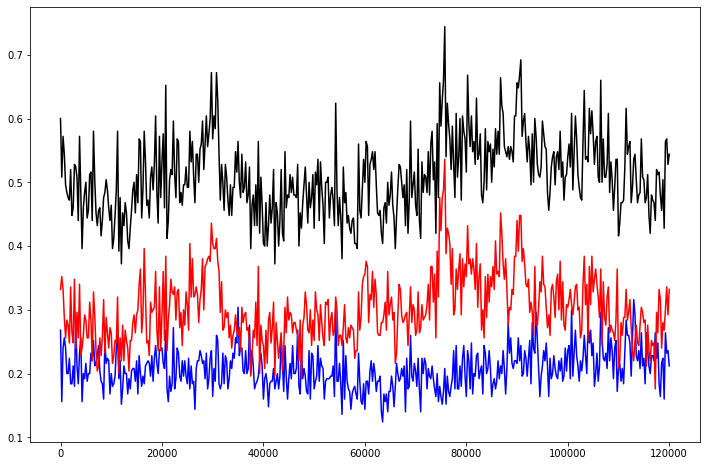

['nP'] [[0.04 0.   0.96]]


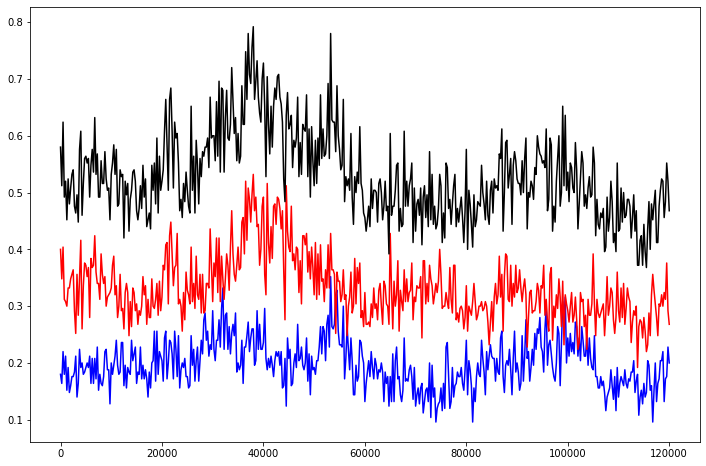

In [13]:
print('False Negative QPEs')
for i in range(8000):
    if test_labels[i] == 'QPE' and test_preds[i] != 'QPE':
        badpred_feats = test_data[i].reshape(1,-1)
        bad_pred_lc_no = all_feats[32000+i,0]
        print(rf.predict(badpred_feats),rf.predict_proba(badpred_feats))
        plt.plot(qpeh_lc[0],qpeh_lc[bad_pred_lc_no+1],color='b')
        plt.plot(qpes_lc[0],qpes_lc[bad_pred_lc_no+1],color='r')
        plt.plot(qpef_lc[0],qpef_lc[bad_pred_lc_no+1],color='k')
        plt.show()

False Negative QPOs
['nP'] [[0.   0.47 0.53]]


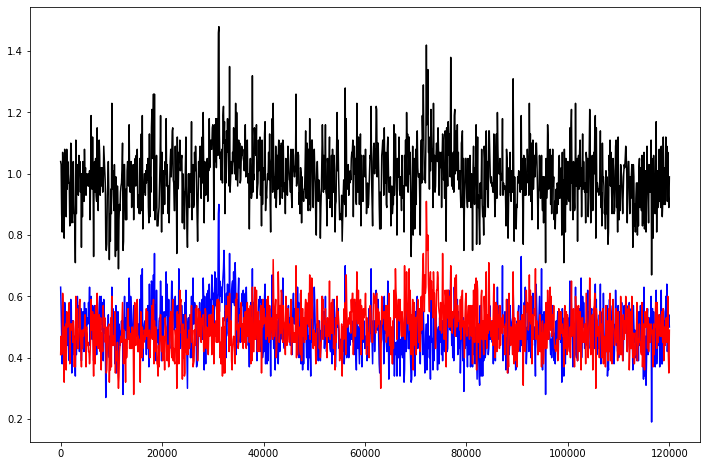

['nP'] [[0.   0.37 0.63]]


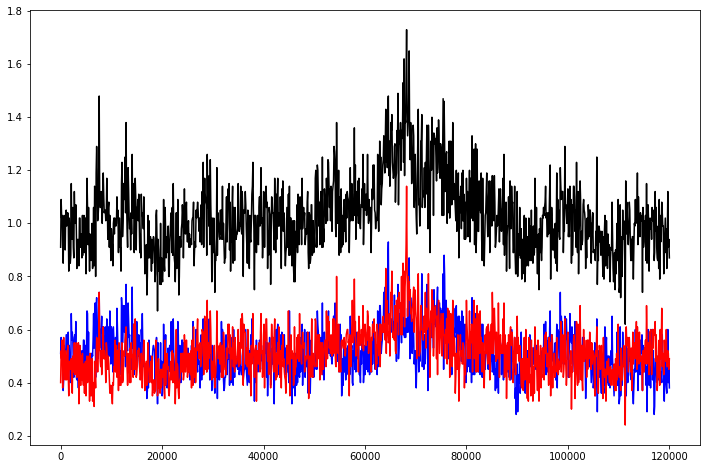

['nP'] [[0.   0.42 0.58]]


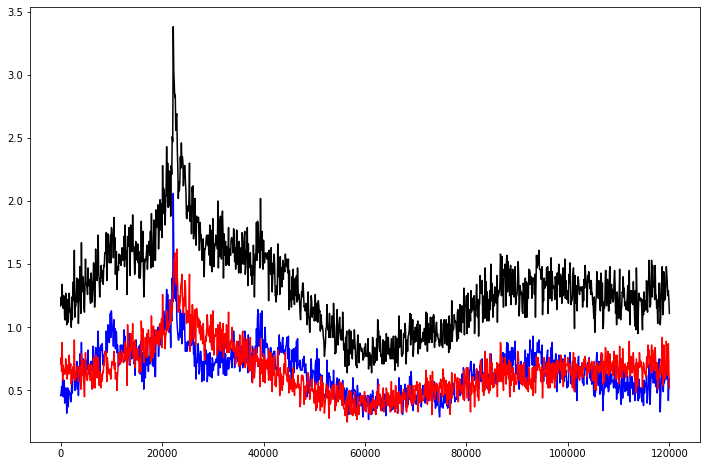

['nP'] [[0.   0.41 0.59]]


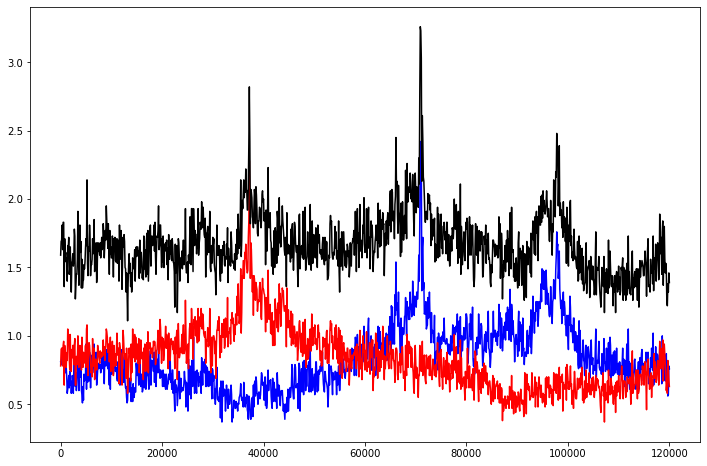

['nP'] [[0.   0.47 0.53]]


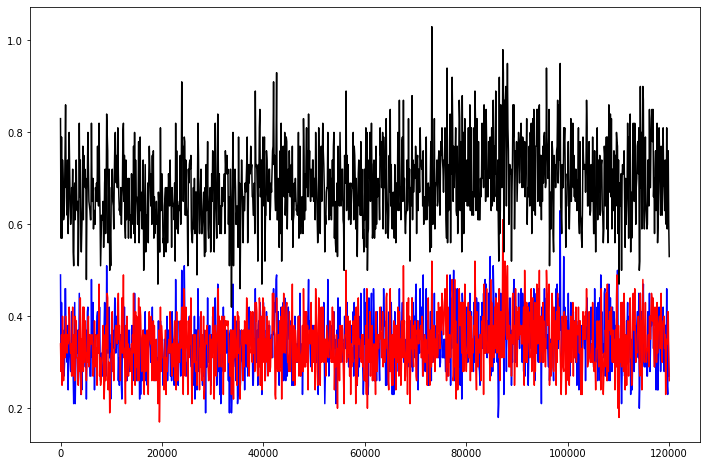

['nP'] [[0.   0.46 0.54]]


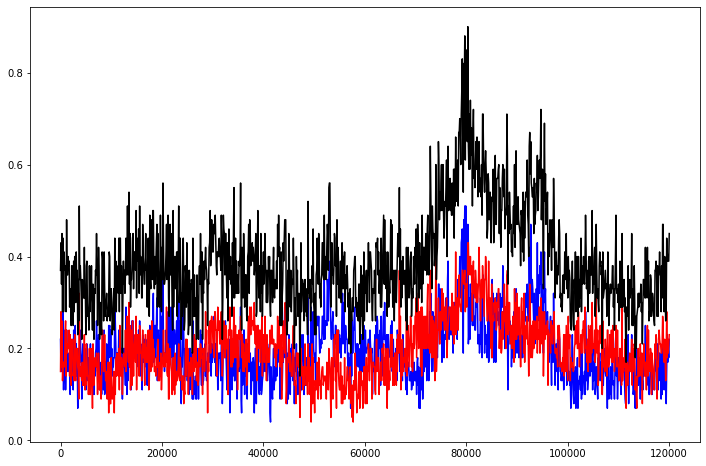

['nP'] [[0.   0.42 0.58]]


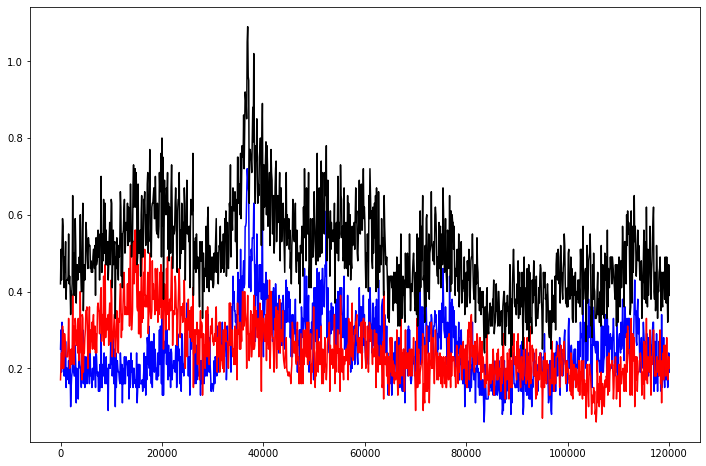

['nP'] [[0.   0.41 0.59]]


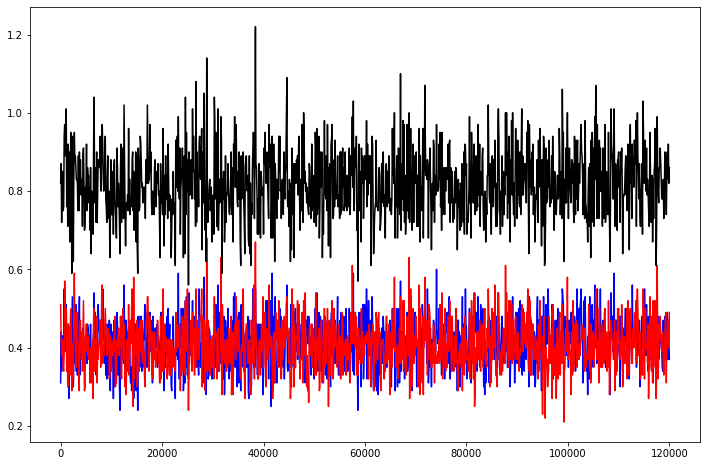

['nP'] [[0.   0.44 0.56]]


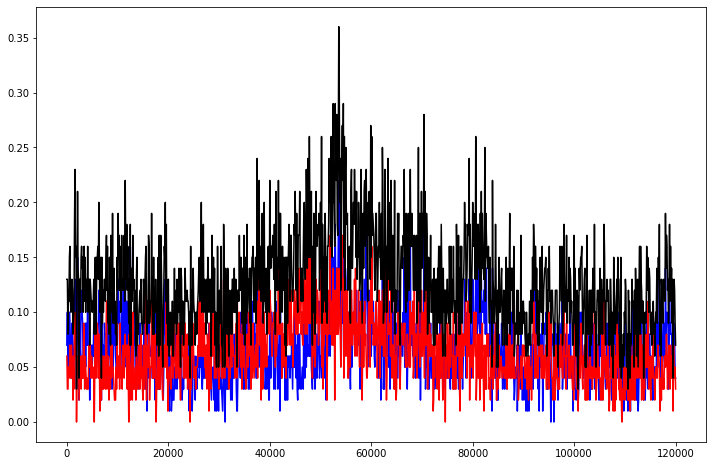

['nP'] [[0.   0.42 0.58]]


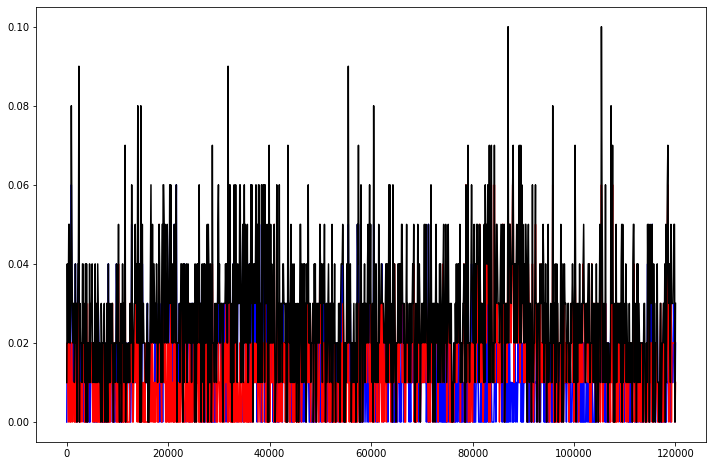

['nP'] [[0.   0.41 0.59]]


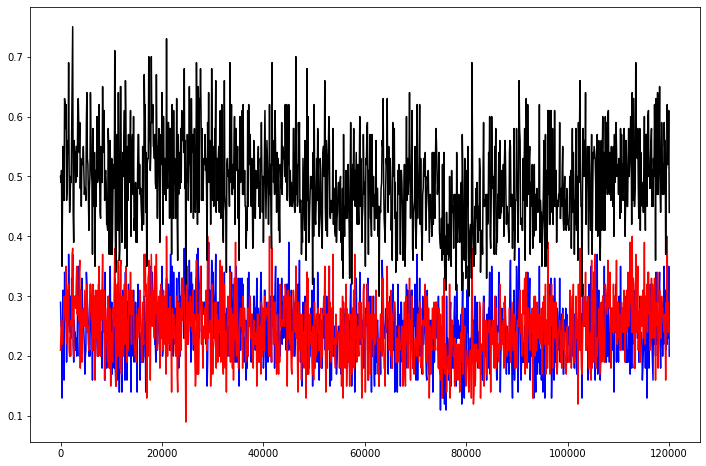

['nP'] [[0.  0.4 0.6]]


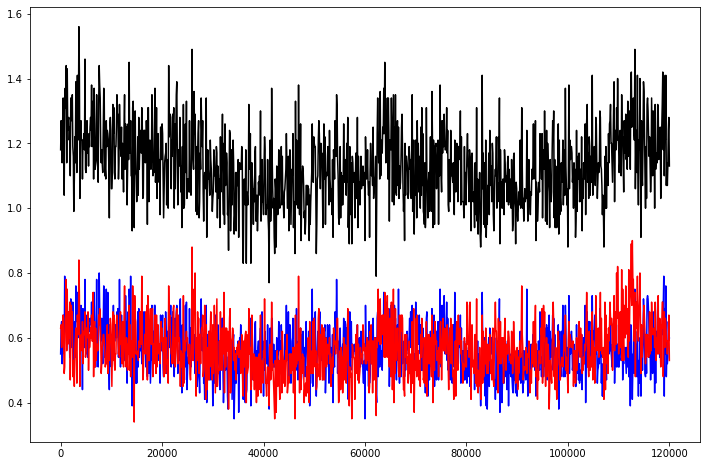

['nP'] [[0.   0.43 0.57]]


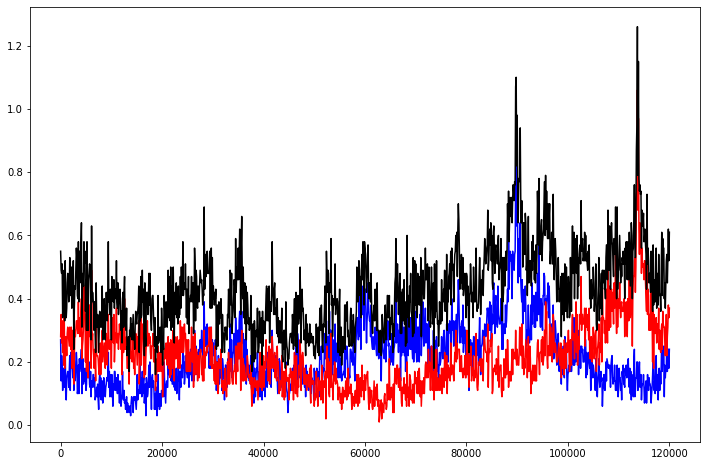

['nP'] [[0.   0.48 0.52]]


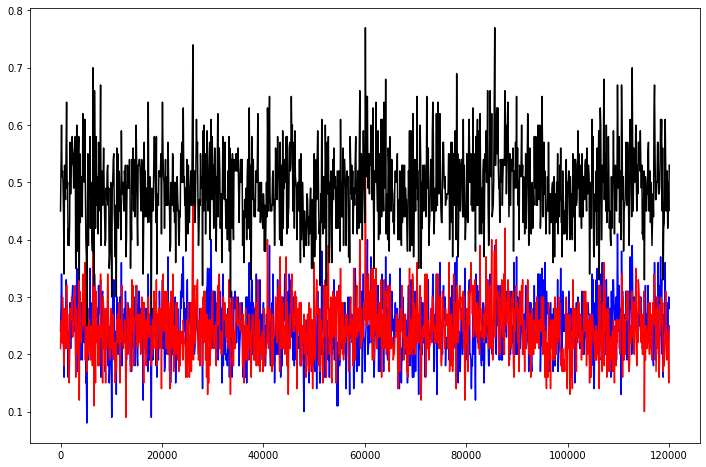

['nP'] [[0.   0.36 0.64]]


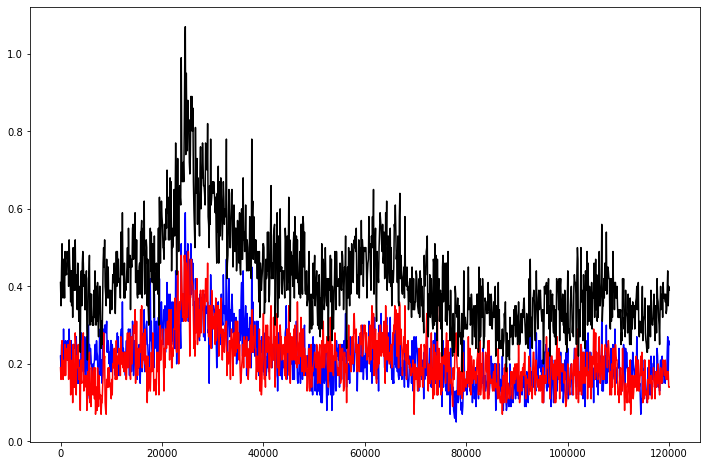

['nP'] [[0.   0.45 0.55]]


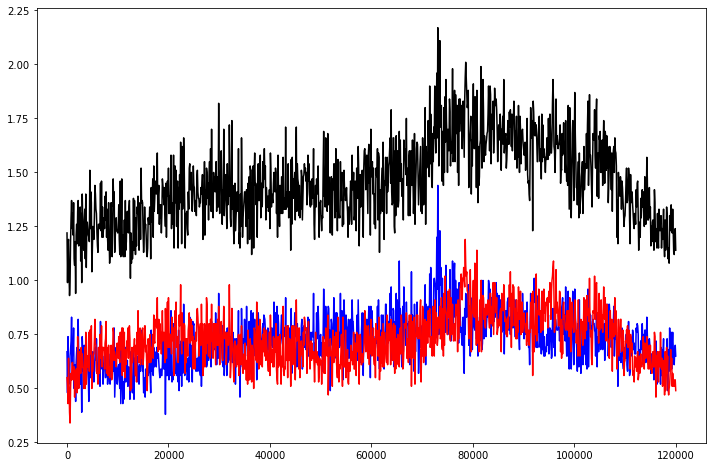

['nP'] [[0.05 0.39 0.56]]


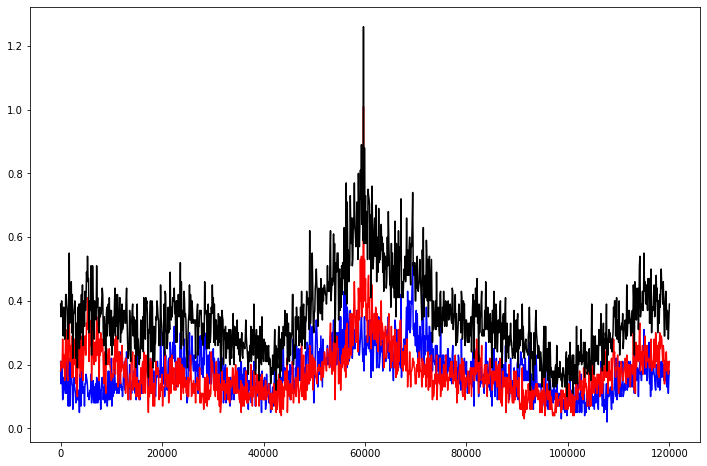

['nP'] [[0.   0.44 0.56]]


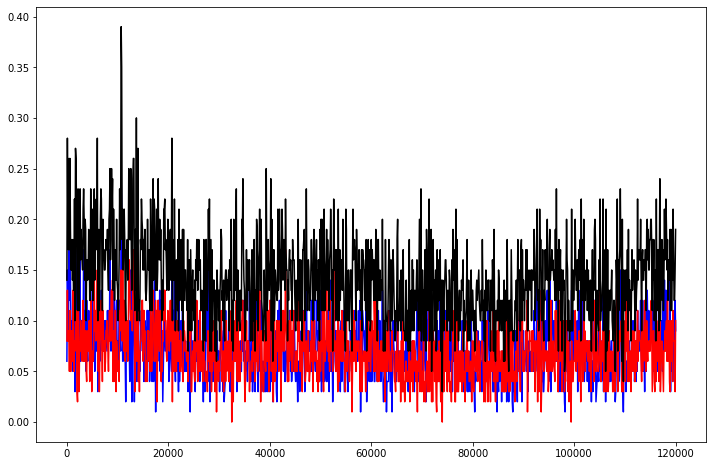

['nP'] [[0.   0.45 0.55]]


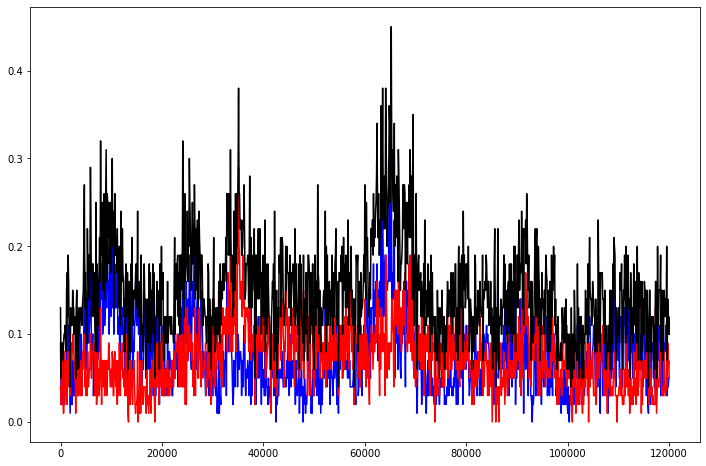

['nP'] [[0.   0.49 0.51]]


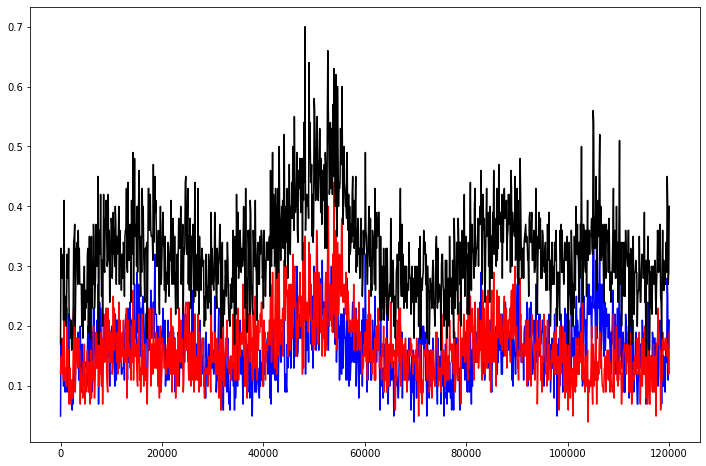

['nP'] [[0.   0.49 0.51]]


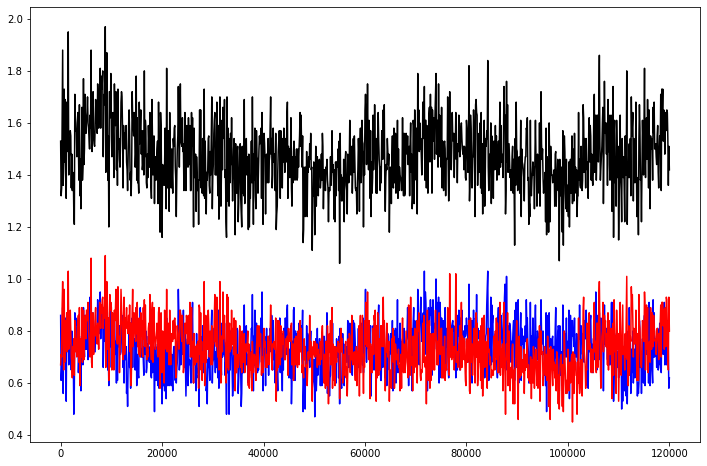

['nP'] [[0.   0.49 0.51]]


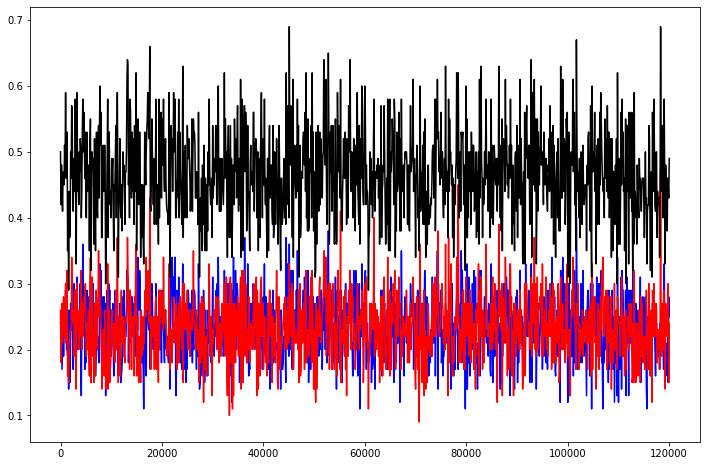

['nP'] [[0.   0.49 0.51]]


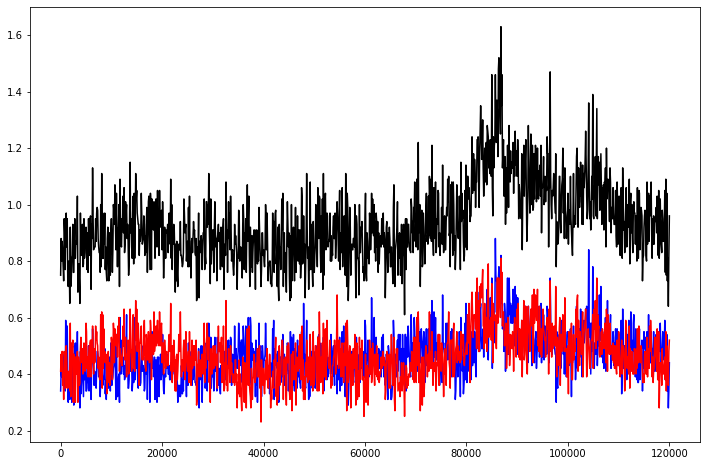

['nP'] [[0.   0.43 0.57]]


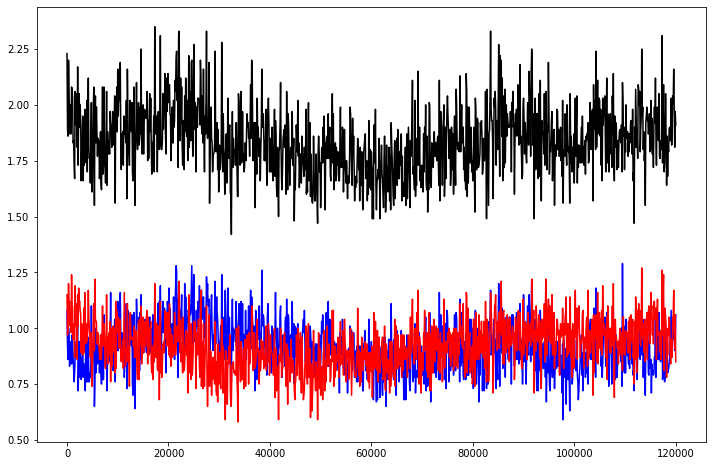

['nP'] [[0.  0.4 0.6]]


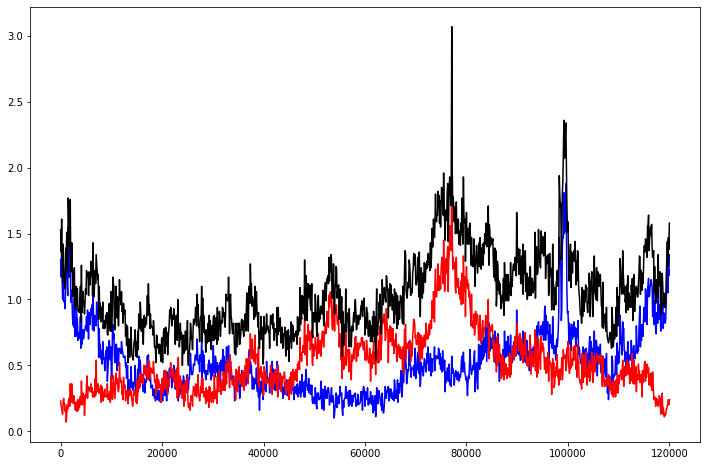

['nP'] [[0.   0.39 0.61]]


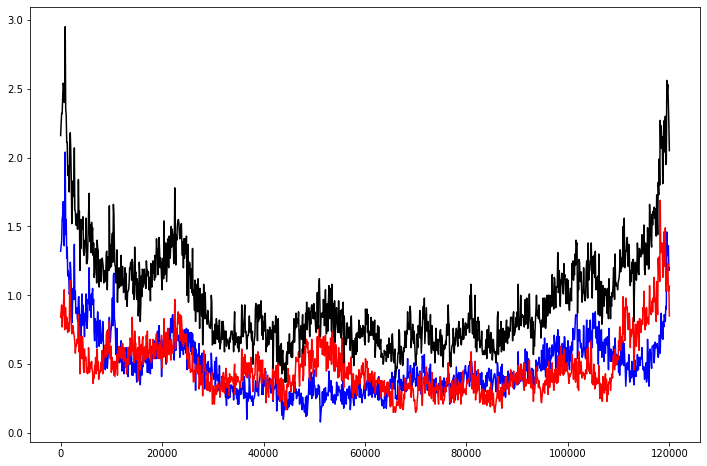

['nP'] [[0.   0.46 0.54]]


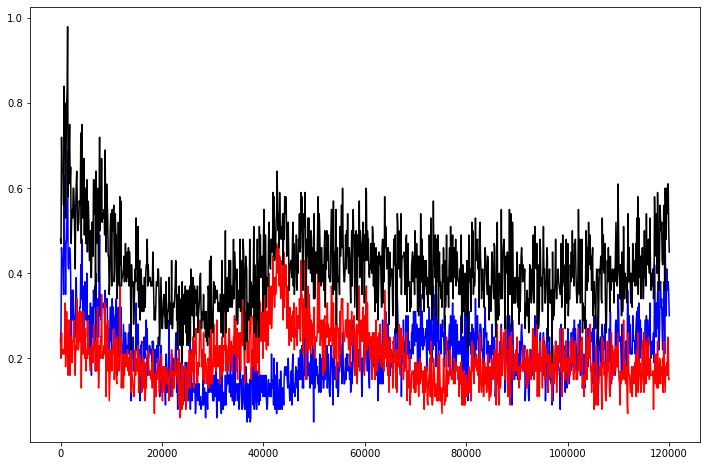

['nP'] [[0.   0.45 0.55]]


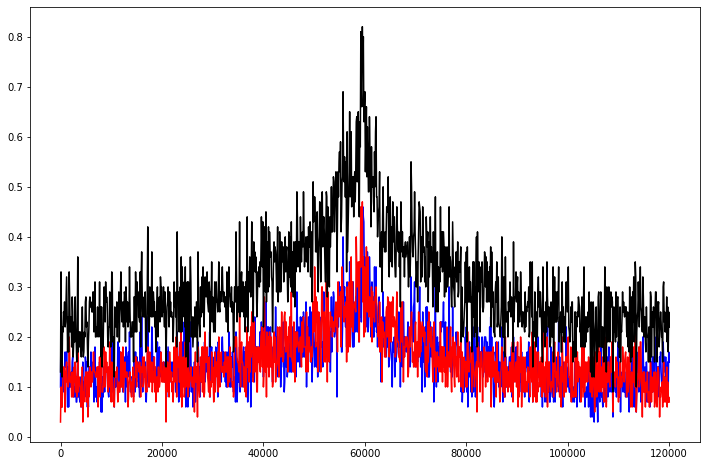

['nP'] [[0.   0.45 0.55]]


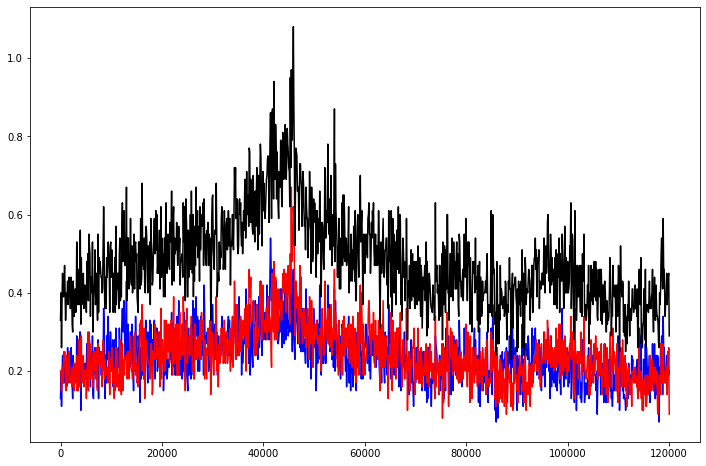

In [14]:
print('False Negative QPOs')
for i in range(8000):
    if test_labels[i] == 'QPO' and test_preds[i] != 'QPO':
        badpred_feats = test_data[i].reshape(1,-1)
        bad_pred_lc_no = all_feats[32000+i,0]
        print(rf.predict(badpred_feats),rf.predict_proba(badpred_feats))
        plt.plot(qpoh_lc[0],qpoh_lc[bad_pred_lc_no-19999],color='b')
        plt.plot(qpos_lc[0],qpos_lc[bad_pred_lc_no-19999],color='r')
        plt.plot(qpof_lc[0],qpof_lc[bad_pred_lc_no-19999],color='k')
        plt.show()